## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

### James

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

### Riley

In [1]:
import pandas as pd
import numpy as np
import geocoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DB/midterm.csv', index_col='Unnamed: 0')

In [3]:
df = df.drop('no_name', axis=1)

In [4]:
df.shape

(165072, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165072 entries, 0 to 165071
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              165072 non-null  object 
 1   mkt_unique_carrier   165072 non-null  object 
 2   branded_code_share   165072 non-null  object 
 3   mkt_carrier          165072 non-null  object 
 4   mkt_carrier_fl_num   165072 non-null  int64  
 5   op_unique_carrier    165072 non-null  object 
 6   tail_num             164593 non-null  object 
 7   op_carrier_fl_num    165072 non-null  int64  
 8   origin_airport_id    165072 non-null  int64  
 9   origin               165072 non-null  object 
 10  origin_city_name     165072 non-null  object 
 11  dest_airport_id      165072 non-null  int64  
 12  dest                 165072 non-null  object 
 13  dest_city_name       165072 non-null  object 
 14  crs_dep_time         165072 non-null  int64  
 15  dep_time         

#### **Task 6**: How many states cover 50% of US air traffic? 

In [6]:
# Separate desired column
states_df = df[['origin_city_name']]
states_df.head()

,origin_city_name
0,"New York, NY"
1,"Detroit, MI"
2,"Newark, NJ"
3,"Newark, NJ"
4,"Houston, TX"


In [7]:
# Remove city name
states_df = states_df.replace(to_replace='.*, ', value='', regex = True)

# Find state counts
state_counts = pd.DataFrame(states_df.value_counts())
state_counts = state_counts.reset_index()
state_counts.columns = ['state', 'count']

# calculate total flights
total = state_counts['count'].sum()

# create percentage feature
state_counts['percentage'] = round(state_counts['count'] / total, 4) * 100

# find number of states that add up to ~50% of US air traffic
print('Air Traffic For Top 7 States:', state_counts.percentage.head(7).sum(), '\n')
print(state_counts.iloc[:7])

Air Traffic For Top 7 States: 49.04 

  state  count  percentage
0    CA  17642       10.69
1    TX  16008        9.70
2    FL  12071        7.31
3    IL  10420        6.31
4    GA   8722        5.28
5    NY   8653        5.24
6    NC   7443        4.51


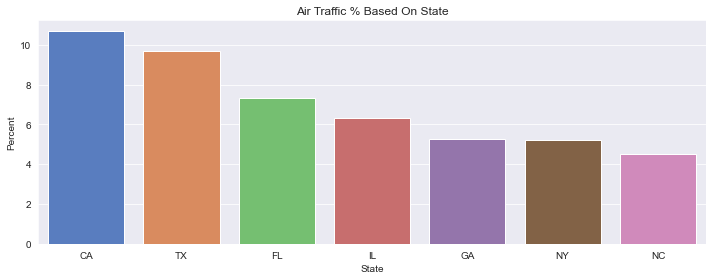

In [8]:
# plot state percentages
barplot = state_counts.iloc[:7]

# plot
sns.set_style('darkgrid')
plt.figure(figsize=(10,4), tight_layout=True)
ax = sns.barplot(x=barplot['state'], y=barplot['percentage'], palette='muted')
ax.set(title='Air Traffic % Based On State', xlabel='State', ylabel='Percent')
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [9]:
# find the most popular flights
test_df = df[['origin','dest','air_time']]
test_df = test_df.groupby(['origin','dest']).count()
test_df = test_df.sort_values(by='air_time',ascending=False).reset_index()
test_df = test_df.rename(columns={'air_time':'flight_count'})
print(test_df.head())

# set origin and destination variables for most popular flight
ori = test_df.iloc[0,0]
des = test_df.iloc[0,1]

  origin dest  flight_count
0    SFO  LAX           358
1    ORD  LGA           324
2    LAX  SFO           314
3    LGA  ORD           307
4    JFK  LAX           284


In [10]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [11]:
# information on most popular flight
df_7 = df[['origin','dest','dep_delay','air_time']]
df_7 = df_7.loc[(df_7['origin'] == ori) & (df_7['dest'] == des)]
df_7.describe()

,dep_delay,air_time
count,358.000000,358.000000
mean,7.567039,56.237430
std,27.721297,3.543574
min,-16.000000,50.000000
25%,-5.000000,54.000000
50%,-2.500000,56.000000
75%,6.750000,58.000000
max,163.000000,83.000000


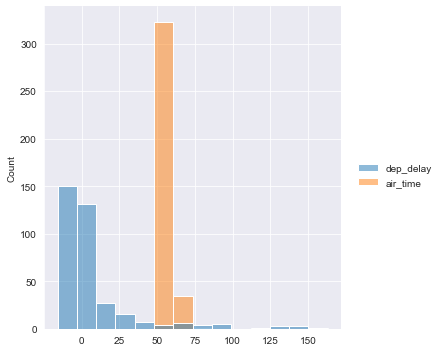

In [12]:
# visualizing initial distribution
x1 = df_7.iloc[:,2:]
sns.displot(x1)
plt.show()

In [13]:
df_7.shape

(365, 4)

In [14]:
df_7.isnull().sum()

origin       0
dest         0
dep_delay    7
air_time     7
dtype: int64

In [15]:
df_7.sort_values(by='dep_delay').tail(8)

,origin,dest,dep_delay,air_time
6551,SFO,LAX,163.0,54.0
24656,SFO,LAX,NaN,NaN
31485,SFO,LAX,NaN,NaN
39461,SFO,LAX,NaN,NaN
67528,SFO,LAX,NaN,NaN
81228,SFO,LAX,NaN,NaN
81233,SFO,LAX,NaN,NaN
106857,SFO,LAX,NaN,NaN


In [16]:
df_7 = df_7.dropna()
df_7.shape

(358, 4)

In [17]:
df_7 = df_7.sort_values(by='dep_delay')

In [18]:
df_7.describe()

,dep_delay,air_time
count,358.000000,358.000000
mean,7.567039,56.237430
std,27.721297,3.543574
min,-16.000000,50.000000
25%,-5.000000,54.000000
50%,-2.500000,56.000000
75%,6.750000,58.000000
max,163.000000,83.000000


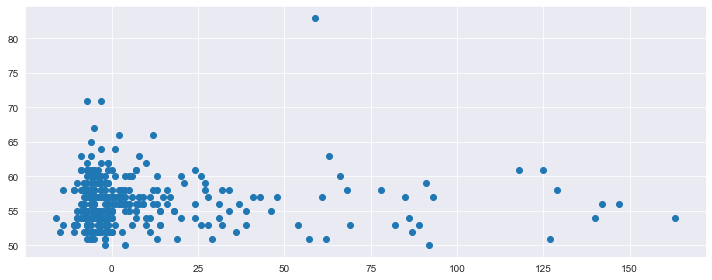

In [19]:
plt.figure(figsize=(10,4), tight_layout=True)
plt.scatter(x=df_7['dep_delay'], y=df_7['air_time'])
plt.show()

In [20]:
df_7.shape

(358, 4)

In [21]:
358 / 4

89.5

In [22]:
# splitting data into quarters
q1 = df_7.iloc[:90,:]
q2 = df_7.iloc[90:180,:]
q3 = df_7.iloc[180:270,:]
q4 = df_7.iloc[270:358,:]

# finding mean values of groupings
q1_mean = q1.describe().iloc[1:2,:]
q2_mean = q2.describe().iloc[1:2,:]
q3_mean = q3.describe().iloc[1:2,:]
q4_mean = q4.describe().iloc[1:2,:]

# create mean df
frames = [q1_mean, q2_mean, q3_mean, q4_mean]
mean_df = pd.concat(frames)
mean_df = mean_df.set_index(pd.Index([1, 2, 3, 4]))
mean_df

,dep_delay,air_time
1,-7.722222,56.255556
2,-4.022222,56.288889
3,0.811111,56.100000
4,41.965909,56.306818


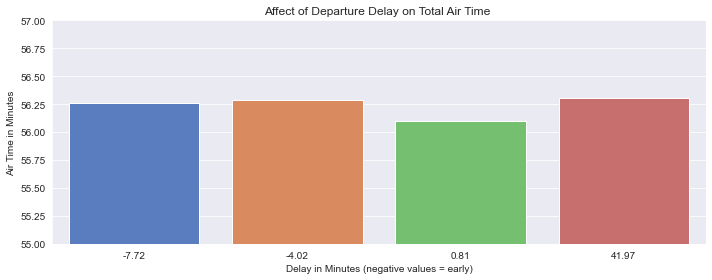

In [23]:
# round to nearest hundredth for visual
rounded_df = mean_df.round(2)

# plot
sns.set_style('darkgrid')
plt.figure(figsize=(10,4), tight_layout=True)
plt.ylim(55, 57)
ax = sns.barplot(x=rounded_df['dep_delay'], y=rounded_df['air_time'], palette='muted')
ax.set(title='Affect of Departure Delay on Total Air Time ', xlabel='Delay in Minutes (negative values = early)', ylabel='Air Time in Minutes')
plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [24]:
# create new dataframe with desired features
df_8 = df[['distance', 'dep_time']]

# quantile binning to separate short, med, and long flights
df_8['dist_quant'] = pd.qcut(df_8.distance, 3, labels=['short', 'medium', 'long'])

/var/folders/yl/ftfrcz0s4nd_pncmmknzn7440000gn/T/ipykernel_52125/3320309509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['dist_quant'] = pd.qcut(df_8.distance, 3, labels=['short', 'medium', 'long'])


In [25]:
df_8[['distance','dist_quant']].head()

,distance,dist_quant
0,733.0,medium
1,1075.0,long
2,488.0,medium
3,199.0,short
4,224.0,short


In [26]:
# drop original distance column
df_8 = df_8.drop(columns=['distance'])

In [27]:
# separate dataframes into distance quantiles
short_flights = df_8.loc[(df_8.dist_quant == 'short')]
med_flights = df_8.loc[(df_8.dist_quant == 'medium')]
long_flights = df_8.loc[(df_8.dist_quant == 'long')]

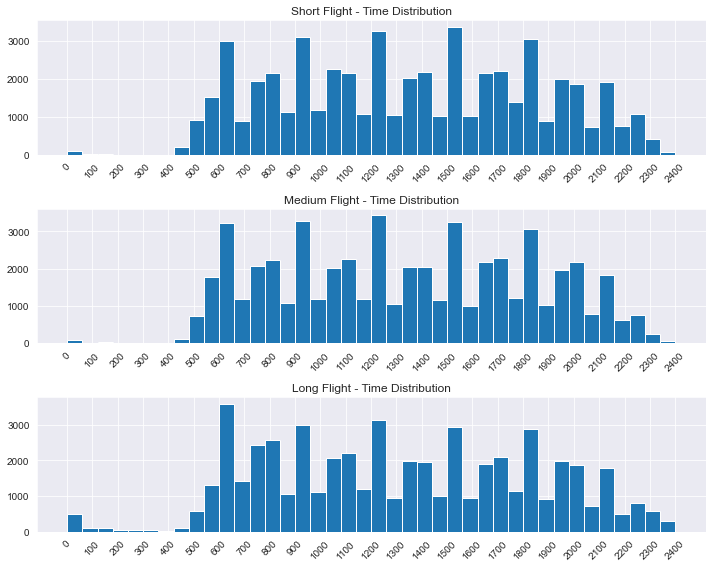

In [28]:
# histograms to visualize peak hours

plt.figure(figsize=(10,8), tight_layout=True)

plt.subplot(3, 1, 1)
plt.hist(short_flights.dep_time, bins=40)
plt.title('Short Flight - Time Distribution')
plt.xticks(np.arange(0, 2500, 100), rotation=45)

plt.subplot(3, 1, 2)
plt.hist(med_flights.dep_time, bins=40)
plt.title('Medium Flight - Time Distribution')
plt.xticks(np.arange(0, 2500, 100), rotation=45)

plt.subplot(3, 1, 3)
plt.hist(long_flights.dep_time, bins=40)
plt.title('Long Flight - Time Distribution')
plt.xticks(np.arange(0, 2500, 100), rotation=45)

plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [225]:
# create new DataFrame from 'passengers_data.csv'
pas_df = pd.read_csv('../DB/passengers_data.csv', index_col='Unnamed: 0')
pas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165928 entries, 0 to 165927
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   departures_scheduled   165928 non-null  float64
 1   departures_performed   165928 non-null  float64
 2   payload                165928 non-null  float64
 3   seats                  165928 non-null  float64
 4   passengers             165928 non-null  float64
 5   freight                165928 non-null  float64
 6   mail                   165928 non-null  float64
 7   distance               165928 non-null  float64
 8   ramp_to_ramp           165928 non-null  float64
 9   air_time               165928 non-null  float64
 10  unique_carrier         165928 non-null  object 
 11  airline_id             165928 non-null  int64  
 12  unique_carrier_name    165928 non-null  object 
 13  region                 165928 non-null  object 
 14  carrier                165928 non-nu

In [226]:
# create working dataframe
pas = pas_df[['passengers', 'origin', 'dest']]


# create flight count feature
busiest_aps = pd.DataFrame(pas[['origin']].value_counts().head(10))
busiest_aps = busiest_aps.reset_index()
busiest_aps = busiest_aps.rename(columns={0:'flight_count'})
busiest_aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   origin        10 non-null     object
 1   flight_count  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [227]:
# helper function

def pass_sum(df):
    
    '''
    Returns a new DataFrame with the total passenger count for 
    the top 10 busiest airports based on total flights.
    
    Arguments:
    df -- DataFrame from passengers table
            - must include 'origin' and 'passengers' features
            
    Returns:
    New DataFrame
        - Columns: 'origin', 'total_pass'
        - Row: 10 ordered rows for 10 busiest airports based on flight count
    '''
    
    # find the ten busiest airports
    
    busiest_ap = df[['origin']].value_counts().head(10).index.tolist()
    
    
    # split ten airports into list
    
    ap_list = []
    pas_list = []
    for port in busiest_ap:
        ap_list.append(port[0])
        pas_list.append(df.loc[(df.origin == port[0])].groupby(by='origin').sum()['passengers'][0])
        
        
    # create DataFrame from new lists
    
    X = {'origin': ap_list,
         'total_pass': pas_list}
    X = pd.DataFrame(X)
    
    
    return X

In [228]:
# use helper function to create total passengers DataFrame
total_pas_df = pass_sum(pas)
total_pas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      10 non-null     object 
 1   total_pass  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [229]:
# merge the total flight and passengers DataFrames
X = pd.merge(busiest_aps, total_pas_df, how='left', on='origin')
print(X)

  origin  flight_count  total_pass
0    ORD          5331  13534818.0
1    ATL          4827  18842804.0
2    DEN          4017  10415222.0
3    LAX          3820  14827542.0
4    IAH          3327   7338538.0
5    DTW          3203   6099075.0
6    MSP          3151   6938827.0
7    DFW          3050  12307578.0
8    EWR          3010   7632355.0
9    MIA          2812   7118168.0


In [230]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [231]:
# scale values for plotting
scaler = MinMaxScaler()


# apply scaler
X[['flight_count','total_pass']] = scaler.fit_transform(X[['flight_count','total_pass']])


# print values to check
print(X)

  origin  flight_count  total_pass
0    ORD      1.000000    0.583483
1    ATL      0.799921    1.000000
2    DEN      0.478364    0.338688
3    LAX      0.400159    0.684923
4    IAH      0.204446    0.097261
5    DTW      0.155220    0.000000
6    MSP      0.134577    0.065895
7    DFW      0.094482    0.487181
8    EWR      0.078603    0.120316
9    MIA      0.000000    0.079968


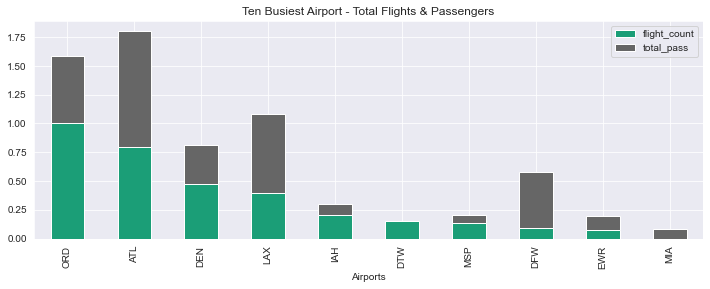

In [232]:
# plot stacked bar plot using scaled values
X.plot(kind='bar', 
       x='origin', 
       stacked=True, 
       cmap='Dark2', 
       figsize=(12,4), 
       title='Ten Busiest Airport - Total Flights & Passengers',
       xlabel='Airports'
      );

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?